In [39]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import torch 
import torch.nn as nn 
import torch.optim as optim 
from src.models.attention__ import *
from src.models.conv_lstm_ import *
from src.models.graph__ import *
from src.utils.preprocessing__ import * 

In [40]:
df = pd.read_csv('data/bike_sharing.csv')

In [41]:
df1 = pd.read_csv('data/bike_sharing_.csv')

In [42]:
df1.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 't_duration_', 'time_of_day_', 'started_at_hour',
       'rides_'],
      dtype='object')

#### **ConvLSTM**

In [43]:
X_train, y_train, X_test, y_test = preprocess(df)
X_train_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[1], 1, 1, 1))  #(samples, timesteps, height, width, channels)
X_test_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1], 1, 1, 1))  #(samples, timesteps, height, width, channels)



In [44]:
X_train

array([[1., 3., 3.],
       [1., 1., 3.],
       [3., 1., 1.],
       ...,
       [1., 3., 4.],
       [3., 1., 3.],
       [2., 3., 1.]])

In [45]:
model = build_conv_lstm_model(input_shape=(X_train_reshaped.shape[1], 1, 1, 1)) 

model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_data=(X_test_reshaped, y_test))


Epoch 1/10
617/617 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - loss: 1.2043 - val_loss: 1.1501
Epoch 2/10
617/617 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - loss: 1.1357 - val_loss: 1.1435
Epoch 3/10
617/617 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - loss: 1.1623 - val_loss: 1.1866
Epoch 4/10
617/617 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 1.1307 - val_loss: 1.1459
Epoch 5/10
617/617 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 1.1114 - val_loss: 1.1711
Epoch 6/10
617/617 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 1.1098 - val_loss: 1.1523
Epoch 7/10
617/617 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 1.1267 - val_loss: 1.1583
Epoch 8/10
617/617 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 1.1074 - val_loss: 1.1843
Epoch 9/10
617/617 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 1.1108 - val_loss: 1.1631
Epoch 10/10
617/617 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 1.1226 - val_loss: 1.2348


Epoch 1/20
617/617 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - loss: 1.1907 - val_loss: 1.2640
Epoch 2/20
617/617 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - loss: 1.1369 - val_loss: 1.2002
Epoch 3/20
617/617 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - loss: 1.1352 - val_loss: 1.1886
Epoch 4/20
617/617 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 1.1260 - val_loss: 1.1743
Epoch 5/20
617/617 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 1.1198 - val_loss: 1.1443
Epoch 6/20
617/617 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 1.1418 - val_loss: 1.1444
Epoch 7/20
617/617 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 1.1225 - val_loss: 1.1887
Epoch 8/20
617/617 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - loss: 1.1325 - val_loss: 1.2193
Epoch 9/20
617/617 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - loss: 1.1018 - val_loss: 1.1603
Epoch 10/20
617/617 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 1.1306 - val_loss: 1.1526
Epoch 11/20
617/617 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - loss: 1.0965 - val_loss: 1.1641
Epoch 12/20
617/617 ━━━━━━━━━━━━━━━━━━━━

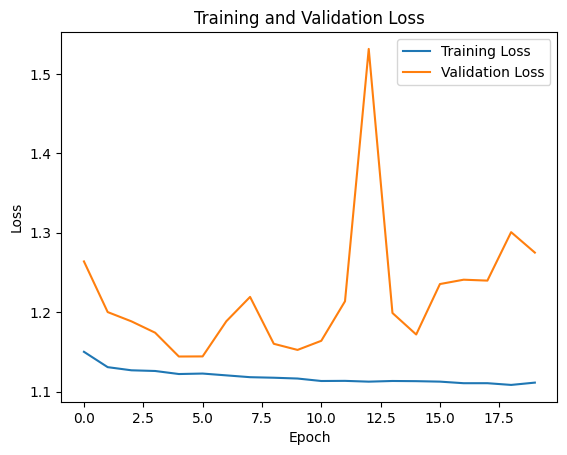

[1.1502294540405273,
 1.1309151649475098,
 1.1269584894180298,
 1.1260896921157837,
 1.122259497642517,
 1.1228561401367188,
 1.1205735206604004,
 1.1182849407196045,
 1.11760675907135,
 1.116595983505249,
 1.1134912967681885,
 1.1136630773544312,
 1.1126703023910522,
 1.1135082244873047,
 1.113283395767212,
 1.112691044807434,
 1.1107105016708374,
 1.1107231378555298,
 1.1085553169250488,
 1.1114531755447388]

In [46]:

model = build_conv_lstm_model(input_shape=(X_train_reshaped.shape[1], 1, 1, 1))

model.compile(optimizer='adam', loss='mae')

history = model.fit(
    X_train_reshaped,
    y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_test_reshaped, y_test),
    verbose=1
)


train_losses = history.history['loss']
val_losses = history.history['val_loss']


def visualize_training_loss(train_losses, val_losses):
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()


visualize_training_loss(train_losses, val_losses)

train_losses


In [47]:
loss = model.evaluate(X_train_reshaped, y_train)
print(f'Train Loss: {loss}')

617/617 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 1.7048
Train Loss: 1.164716124534607


In [48]:
loss = model.evaluate(X_test_reshaped, y_test)
print(f'Test Loss: {loss}')

predictions = model.predict(X_test_reshaped)
print(predictions[:5])

155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.8384
Test Loss: 1.275054693222046
155/155 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
[[1.5570005]
 [1.0296361]
 [1.0296307]
 [1.0300595]
 [1.2720106]]


617/617 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step


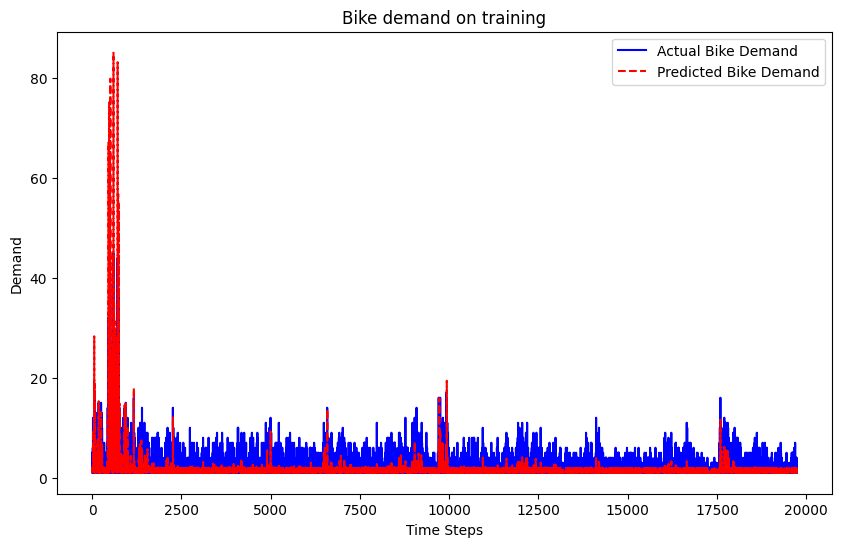

In [49]:
y_train_pred = model.predict(X_train_reshaped)


plt.figure(figsize=(10, 6))
plt.plot(y_train, label='Actual Bike Demand', color='blue')
plt.plot(y_train_pred, label='Predicted Bike Demand', color='red', linestyle='--')
plt.title('Bike demand on training')
plt.xlabel('Time Steps')
plt.ylabel('Demand')
plt.legend()
plt.show()


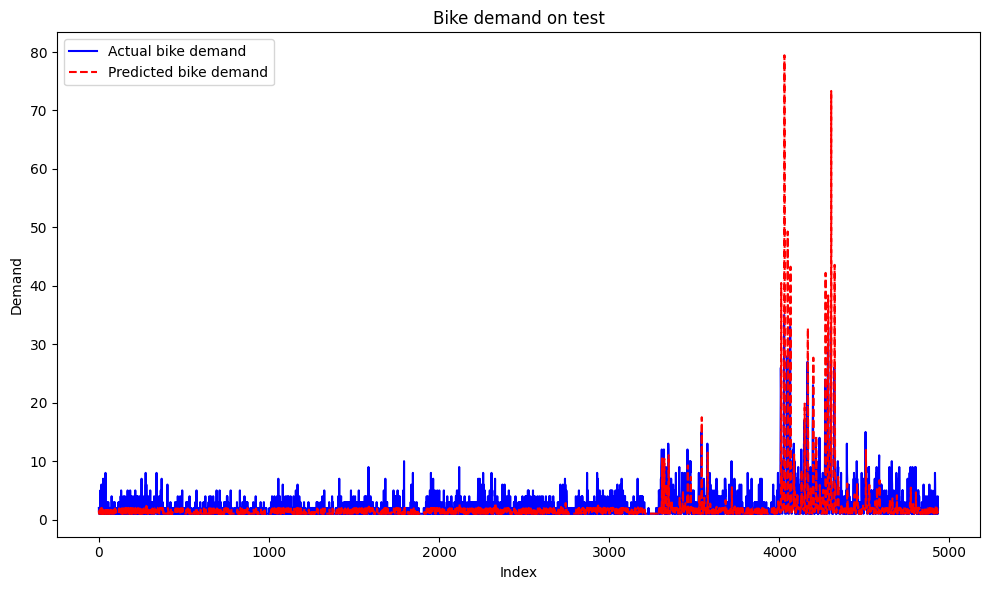

In [50]:
plt.figure(figsize=(10, 6))


plt.plot(y_test, label='Actual bike demand', color='blue',)
plt.plot(predictions, label='Predicted bike demand', color='red', linestyle='--', )


plt.title('Bike demand on test')
plt.xlabel('Index')
plt.ylabel('Demand')

plt.legend()


plt.tight_layout()
plt.show()


#### **Attention based Model**

Epoch 1/20
617/617 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 4.8522 - mae: 1.3722 - val_loss: 5.2763 - val_mae: 1.3537
Epoch 2/20
617/617 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 4.1861 - mae: 1.2364 - val_loss: 5.0978 - val_mae: 1.2925
Epoch 3/20
617/617 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 3.5996 - mae: 1.2131 - val_loss: 5.0998 - val_mae: 1.2429
Epoch 4/20
617/617 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 3.7883 - mae: 1.2026 - val_loss: 5.1330 - val_mae: 1.2921
Epoch 5/20
617/617 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 3.7756 - mae: 1.2317 - val_loss: 5.0270 - val_mae: 1.3099
Epoch 6/20
617/617 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 3.6664 - mae: 1.2196 - val_loss: 5.1321 - val_mae: 1.2405
Epoch 7/20
617/617 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 3.9309 - mae: 1.2391 - val_loss: 5.1099 - val_mae: 1.2763
Epoch 8/20
617/617 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 3.8139 - mae: 1.2285 - val_loss: 5.0420 - val_mae: 1.2529
Epoch 9/20
617/617 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - lo

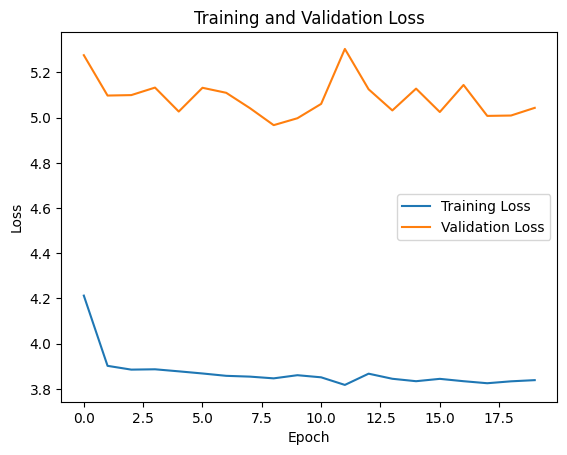

[4.212767124176025,
 3.9021008014678955,
 3.8853566646575928,
 3.886836051940918,
 3.8777921199798584,
 3.8683223724365234,
 3.8579225540161133,
 3.854386568069458,
 3.846745491027832,
 3.860687255859375,
 3.8513286113739014,
 3.817692279815674,
 3.867424964904785,
 3.844874382019043,
 3.8341450691223145,
 3.8445539474487305,
 3.834130048751831,
 3.825171709060669,
 3.8336308002471924,
 3.8388376235961914]

In [51]:
X_train, y_train, X_test, y_test = preprocess(df, lag_hours=3, test_size=0.2)


model = attention_lstm_model(input_shape=(X_train.shape[1], 1))


X_train_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


model.compile(optimizer='adam', loss='mse', metrics=['mae'])


history = model.fit(
    X_train_reshaped,
    y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_test_reshaped, y_test),
    verbose=1
)


train_losses = history.history['loss']
val_losses = history.history['val_loss']


def visualize_training_loss(train_losses, val_losses):
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()


visualize_training_loss(train_losses, val_losses)


train_losses



In [52]:
model.evaluate(X_train_reshaped, y_train)

617/617 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 7.9323 - mae: 1.5663


[3.8041155338287354, 1.2143795490264893]

In [53]:
def make_inference(model, X_input):
    """
    Make predictions using the trained model.
    
    Parameters:
    model: Keras model
        The trained model for making predictions.
    X_input: np.ndarray
        Input data for prediction, shaped as (timesteps, features).
        
    Returns:
    y_pred: np.ndarray
        Predicted values for the next time step.
    """
    # Ensure input shape is correct for the model
    X_input = np.expand_dims(X_input, axis=0)  # Add batch dimension if not present
    
    # Make predictions
    y_pred = model.predict(X_input)
    
    return y_pred


155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


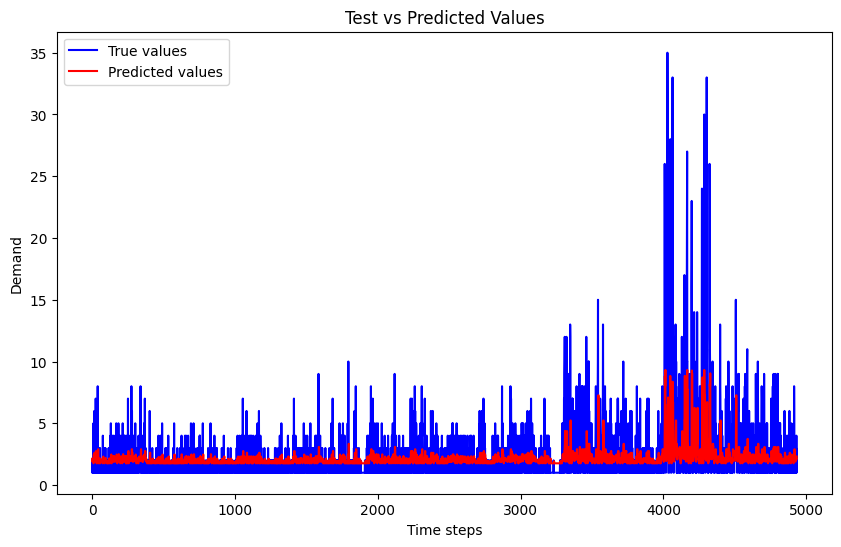

In [54]:
import matplotlib.pyplot as plt

# Predict on the test data
y_pred_test = model.predict(X_test_reshaped)

# Plot test vs predicted values
plt.figure(figsize=(10,6))
plt.plot(y_test, label='True values', color='blue')
plt.plot(y_pred_test, label='Predicted values', color='red')
plt.xlabel('Time steps')
plt.ylabel('Demand')
plt.legend()
plt.title('Test vs Predicted Values')
plt.show()


#### **Graph convolutional netwrok**

In [55]:
df = df1.copy()
df = df.dropna()

x, edge_index = preprocess_graph_data(df)


input_dim = x.shape[1]
hidden_dim = 64
output_dim = 64
model = GCNModel(input_dim, hidden_dim, output_dim)

criterion = nn.L1Loss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


c:\Users\Bureau\Desktop\bike_sharing__\src\utils\preprocessing__.py:130: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\utils\tensor_new.cpp:281.)
  edge_index = torch.tensor(np.nonzero(adj_matrix), dtype=torch.long)


c:\Users\Bureau\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\nn\modules\loss.py:128: UserWarning: Using a target size (torch.Size([54667, 1])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


Epoch 0/20, Loss: 4.132451057434082
Epoch 1/20, Loss: 4.102840900421143
Epoch 2/20, Loss: 4.073079586029053
Epoch 3/20, Loss: 4.0430989265441895
Epoch 4/20, Loss: 4.012824535369873
Epoch 5/20, Loss: 3.982241153717041
Epoch 6/20, Loss: 3.9512696266174316
Epoch 7/20, Loss: 3.919818878173828
Epoch 8/20, Loss: 3.8877992630004883
Epoch 9/20, Loss: 3.8551206588745117
Epoch 10/20, Loss: 3.821718215942383
Epoch 11/20, Loss: 3.7875139713287354
Epoch 12/20, Loss: 3.7524306774139404
Epoch 13/20, Loss: 3.7163925170898438
Epoch 14/20, Loss: 3.6793103218078613
Epoch 15/20, Loss: 3.64111065864563
Epoch 16/20, Loss: 3.601719379425049
Epoch 17/20, Loss: 3.5610508918762207
Epoch 18/20, Loss: 3.51899790763855
Epoch 19/20, Loss: 3.475461959838867


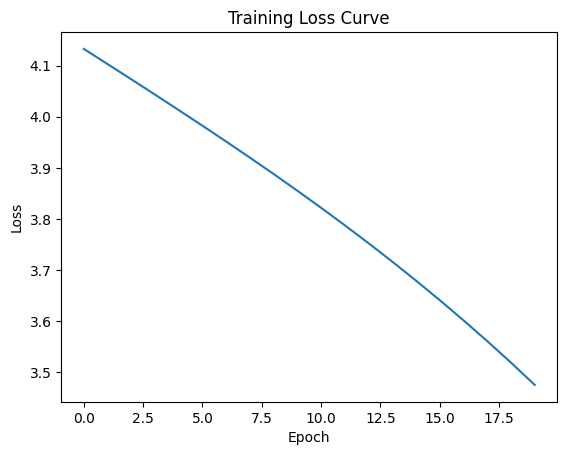

In [56]:
y = torch.tensor(df['rides_'].values, dtype=torch.float32).view(-1, 1)  

train_losses = []
num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()


    predictions = model(x, edge_index)


    loss = criterion(predictions, y)
    train_losses.append(loss.item())

 
    loss.backward()
    optimizer.step()

 
    if epoch % 1 == 0:
        print(f"Epoch {epoch}/{num_epochs}, Loss: {loss.item()}")

plt.plot(train_losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.show()

In [57]:
model.eval()
with torch.no_grad():
    predictions = model(x, edge_index)
    print(predictions)


tensor([0.8334])


In [58]:
predictions.shape

torch.Size([1])